# **Word2vec embeddings**

**An introduction of genism word2vec model with an example of generating word embedding.**

In [1]:
import gensim                                      #importing gensim library 

from gensim.models import Word2Vec                #importing Word2Vec model from Gensim

from gensim.test.utils import common_texts       ##Sample set of text

In [2]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

**Gensim word2vec Model Training**


- We can train the gensim word2vec model as following:

In [3]:
model = Word2Vec(sentences=common_texts, size=3, window=5, min_count=1, workers=4)  
model.save("word2vec.model")

**Let’s try to understand the hyperparameters of this model.**

- **size**: The number of dimensions of the embeddings and the default is 100.
- **window**: The maximum distance between a target word and words around the target word. The default window is 5.
- **min_count** : The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- **workers**: The number of partitions during training and the default workers is 3.
sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

**After training the word2vec model, we can obtain the word embedding directly from the training model as following.**

In [4]:
print("Embeddings of a Word computer with 3 as Embedding Dimension")

print(model.wv['computer'])

print("Embeddings of a Word Tree with 3 as Embedding Dimension")

print(model.wv['trees'])

print("Embeddings of a Word Graph with 3 as Embedding Dimension")

print(model.wv['graph'])

Embeddings of a Word computer with 3 as Embedding Dimension
[ 0.10328556 -0.03278229 -0.05929918]
Embeddings of a Word Tree with 3 as Embedding Dimension
[0.06131093 0.00685018 0.10943222]
Embeddings of a Word Graph with 3 as Embedding Dimension
[-0.03234583 -0.10306738  0.15298335]


In [5]:
inter_array=model.wv['graph']
comp_array=model.wv['computer']
tree_array=model.wv['trees']

 **3-Dimensional representation of words-computer, graph & tree**

No handles with labels found to put in legend.


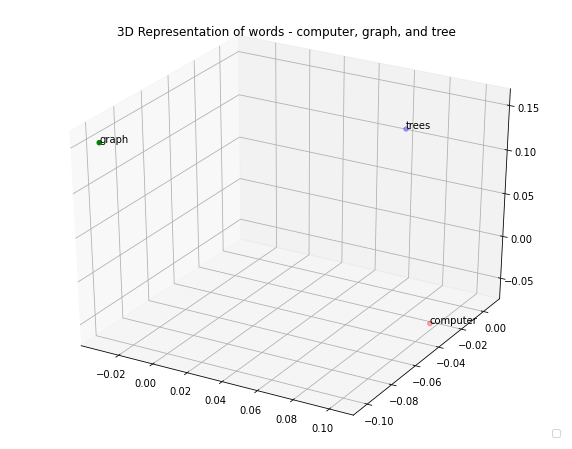

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
c=[10,20,30]

labels=['computer', 'graph', 'trees']



fig = plt.figure(figsize=(10, 8))
 
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = [comp_array[2], inter_array[2], tree_array[2]]
x = [comp_array[0], inter_array[0], tree_array[0]]
y = [comp_array[1], inter_array[1], tree_array[1]]
 
# plotting
ax.scatter(x, y, z, color=['red','green','blue'])

ax.text(comp_array[0],comp_array[1],comp_array[2], "computer")
ax.text(inter_array[0],inter_array[1],inter_array[2], "graph")
ax.text(tree_array[0],tree_array[1],tree_array[2], "trees")

ax.legend(loc="lower right")

ax.set_title('3D Representation of words - computer, graph, and tree')
plt.show()

# **Problem-solving with ML-DL: Automatic Document Classification**




---




###**Context & Description:**
- **Text documents are one of the richest sources of data for businesses:** whether in the shape of customer support tickets, emails, technical documents, user reviews or news articles, they all contain valuable information that can be used to automate slow manual processes, better understand users, or find valuable insights. 
-However, **traditional algorithms struggle at processing these unstructured documents**, and this is where machine learning and deep learning come to the rescue!
- Our goal will be to **build a system that can accurately classify previously unseen news articles into the right category**.
- We’ll use a public dataset from BBC that comprises of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport and tech.

###**Importing the Libraries**

- Let’s get started. First, we will import the necessary libraries like TensorFlow, NumPy and CSV.

In [7]:
import csv                                                                       #CSV File Reading and Writing
import tensorflow as tf  
import numpy as np    
from tensorflow.keras.preprocessing.text import Tokenizer                        # Text tokenization utility class.
from tensorflow.keras.preprocessing.sequence import pad_sequences                # Pads sequences to the same length.
from tensorflow.keras.models import Sequential                                   # 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional      #Keras layers API.
print(tf.__version__)

2.5.0


###**Getting the Data**

- We will get the data from https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv and save it in a /tmp folder with the file name bbc-text.csv.

- **wget():** The non-interactive network downloader
- **--no-check-certificate:** Don't check the server certificate against the available certificate authorities.  Also don't require
    the URL host name to match the common name presented by the certificate.

In [8]:
!wget --no-check-certificate \
    https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-08-06 07:54:22--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-08-06 07:54:22 (216 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



###**Importing the NTLK Library**

- We will import the NLTK library and import the stopwords function. We will use the stopwords for the English language. 
- A few examples for English stopwords: has, hasn’t, and, aren’t, because, each, during.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Setting the Hyper-Parameters**

- We set the Hyper-Parameters that are required to build and train the model.
-**BATCH_SIZE** It defines the number of samples that will be propagated through the neural network.


In [10]:
vocab_size = 5000                                                    # Make the top list of words (common words)
embedding_dim = 64                                                   # Dimension of vectors
max_length = 200                                                     # The length of the tokenized text
trunc_type = 'post'                                                  
padding_type = 'post'
oov_tok = '<OOV>'                                                    #OOV = Out of Vocabulary
training_portion = .8                                                #Split the data

### **Populating the list and removing the stopwords**

- We populate the list of articles and labels from the data and also remove the stopwords.
- Printing the total number of labels and articles.


In [11]:
articles = []                                                                    #list of article
labels = []                                                                      #List of labels

#Extraction of article and labels data from the "bbc-text.csv" file

with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')                                # Removal of tokens if they are stopwords
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [12]:
labels[:2]                                                    

['tech', 'business']

In [13]:
articles[:2]

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

### **Creating the Training and Validation Set**

- Then we need to split them into the training set and validation set. We set 80% (training_portion = .8) for training and another 20% for validation.
- Printing the training and validation datasets.

In [14]:
train_size = int(len(articles) * training_portion)                                # Nu of article in train_article data.

train_articles = articles[0: train_size]                                          
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print("train_size",  train_size)
print(f"train_articles {len(train_articles)}")
print("train_labels", len(train_labels))
print("validation_articles", len(validation_articles))
print("validation_labels", len(validation_labels))

train_size 1780
train_articles 1780
train_labels 1780
validation_articles 445
validation_labels 445


###**Tokenization on "train_articles"**

- The oov_token is the value \<OOV\> that we put if the word is not listed in the dictionary.

In [15]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

###**Converting to Sequences on "train_articles"**

In [16]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [17]:
print(train_sequences[10]), len(train_sequences[10])

[2431, 1, 225, 4994, 22, 641, 587, 225, 4994, 1, 1, 1662, 1, 1, 2431, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1693, 1, 1720, 4995, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4513, 1, 2, 2874, 1505, 352, 4738, 1, 52, 341, 1, 352, 2171, 3961, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2366, 347, 4739, 1, 365, 22, 1, 787, 2367, 1, 4301, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4994, 1, 599, 1, 1693, 1021, 1, 4996, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4997, 542, 492, 1, 1444, 4740, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1364, 6, 1, 2431, 564, 22, 2971, 4734, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4302, 247]


(None, 186)

In [18]:
print(train_sequences[0]), len(train_sequences[0])

[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1303, 4288, 129, 175, 3652, 1213, 1194, 1577, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3261, 1214, 2421, 569, 451, 1375, 58, 3378, 3521, 1660, 8, 921, 730, 10, 844, 1, 9, 598, 1578, 1107, 395, 1940, 1106, 731, 49, 537, 1397, 2009, 1622, 134, 249, 113, 2355, 795, 4979, 980, 584, 10, 3956, 3957, 921, 2563, 129, 344, 175, 3652, 1, 1, 39, 62, 2867, 28, 9, 4722, 18, 1304, 136, 416, 7, 143, 1423, 71, 4500, 436, 4980, 91, 1107, 77, 1, 82, 2010, 53, 1, 91, 6, 1008, 609, 89, 1303, 91, 1962, 131, 137, 420, 9, 2868, 38, 152, 1233, 89, 1303, 4723, 7, 436, 4980, 3153, 6, 2492, 1, 431, 1126, 1, 1424, 570, 1260, 1902, 1, 766, 9, 537, 1397, 2009, 134, 2068, 400, 845, 1963, 1600, 34, 1716, 2869, 1, 1, 2422, 244, 9, 2625, 82, 732, 6, 1172, 1195, 152, 720, 591, 1, 124, 28, 1304, 1689, 432, 83, 933, 115, 20, 14, 18, 3154, 1, 37, 1484, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1963, 1358, 328, 1, 299, 732, 1173, 18, 2870, 1716, 1, 294, 756, 1074, 395, 2011, 387, 431

(None, 425)

###**Padding and Truncating on "train_sequences"**

- The pad_sequences() function in the Keras deep learning library is used to pad variable-length sequences.

- It can be applied to the beginning or the end of the sequences, termed as pre- or post- sequences padding.

- The length of sequences can also be trimmed down to a desired length.

- Sequences can be truncated by removing timesteps from the beginning or the end.

In [19]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
train_padded[10]

array([2431,    1,  225, 4994,   22,  641,  587,  225, 4994,    1,    1,
       1662,    1,    1, 2431,   22,  564,    1,    1,  140,  278,    1,
        140,  278,  796,  823,  662, 2307,    1, 1144, 1693,    1, 1720,
       4995,    1,    1,    1,    1,    1, 4737,    1,    1,  122, 4513,
          1,    2, 2874, 1505,  352, 4738,    1,   52,  341,    1,  352,
       2171, 3961,   41,   22, 3794,    1,    1,    1,    1,  542,    1,
          1,    1,  835,  631, 2366,  347, 4739,    1,  365,   22,    1,
        787, 2367,    1, 4301,  138,   10,    1, 3664,  682, 3531,    1,
         22,    1,  414,  823,  662,    1,   90,   13,  633,    1,  225,
       4994,    1,  599,    1, 1693, 1021,    1, 4996,  807, 1864,  117,
          1,    1,    1, 2974,   22,    1,   99,  278,    1, 1607, 4997,
        542,  492,    1, 1444, 4740,  779, 1320,    1, 1861,   10,   33,
        641,  319,    1,   62,  478,  564,  301, 1506,   22,  479,    1,
          1, 1665,    1,  797,    1, 3066,    1, 13

In [21]:
print("len train_sequnces[0]: ", len(train_sequences[0]))
print("len train_padded[0]: ", len(train_padded[0]))

print("len train_sequences[1]: ", len(train_sequences[1]))
print("len train_padded[1]: ", len(train_padded[1]))

print("len train_sequences[10]: ", len(train_sequences[10]))
print("len train_padded[10]: ", len(train_padded[10]))

len train_sequnces[0]:  425
len train_padded[0]:  200
len train_sequences[1]:  192
len train_padded[1]:  200
len train_sequences[10]:  186
len train_padded[10]:  200


###**Converting to Sequence, Padding & Truncating on "validation_articles"**

In [22]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


###**Labels**

- The sequence of the dictionary is important when we do the prediction later.

In [23]:
print(set(labels))

{'business', 'tech', 'sport', 'entertainment', 'politics'}


###**Tokenizing and converting to Sequence on "train_labels" and "validation_labels"**

In [24]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [25]:
#labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
label_tokenizer.word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}

In [26]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
print('-------------')
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
-------------
[5]
[4]
[3]
(445, 1)


###**Creating the Sequential Model**

Now we will be creating the sequential model. The model architecture consists of the following layers:

  

In [27]:
model = Sequential()                                                                            #Instantiating the Sequential model

model.add(Embedding(vocab_size, embedding_dim))                                                 #Initializing the embedding layer
model.add(Dropout(0.5))                                                                         #Initializing the dropout layer to avoid the overfitting
model.add(Bidirectional(LSTM(embedding_dim)))                                                   # Initialization of Bi-directional LSTM Layer
model.add(Dense(6, activation='softmax'))                                                       # softmax converts a vector of values to a probability distribution.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 386,822
Trainable params: 386,822
Non-trainable params: 0
_________________________________________________________________


**Embedding Layer**
- Word embeddings allow the value of the vector’s element to be trained. After training, words with similar meanings often have similar vectors.

**Dropout Layer**
- Adding the dropout layer to combat overfitting.

**Bidirectional LSTM Layer**
- The Bidirectional layer propagates the input forward and backwards through the LSTM layer and then concatenates the output. This helps the LSTM to learn long range dependencies.

**Dense Layer**
- This the final layer, the Dense layer with softmax activation for the multi-class classification.

###**Compiling the Model**

- We then compile the model to configure the training process with the loss sparse_categorical_crossentropy since we didn’t one-hot encode the labels. We use the Adam optimizer.



In [28]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',                        #crossentropy loss function when there are two or more label classes.
    optimizer=opt,
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


###**Training the Model**

In [29]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 10s - loss: 1.6208 - accuracy: 0.2657 - val_loss: 1.5374 - val_accuracy: 0.3236
Epoch 2/10
56/56 - 1s - loss: 1.2126 - accuracy: 0.4787 - val_loss: 0.9704 - val_accuracy: 0.5753
Epoch 3/10
56/56 - 2s - loss: 0.7954 - accuracy: 0.6809 - val_loss: 0.7207 - val_accuracy: 0.8180
Epoch 4/10
56/56 - 2s - loss: 0.4106 - accuracy: 0.9101 - val_loss: 0.4072 - val_accuracy: 0.8697
Epoch 5/10
56/56 - 2s - loss: 0.1828 - accuracy: 0.9461 - val_loss: 0.4426 - val_accuracy: 0.8337
Epoch 6/10
56/56 - 2s - loss: 0.1411 - accuracy: 0.9713 - val_loss: 0.2705 - val_accuracy: 0.9124
Epoch 7/10
56/56 - 1s - loss: 0.0465 - accuracy: 0.9961 - val_loss: 0.3358 - val_accuracy: 0.8899
Epoch 8/10
56/56 - 2s - loss: 0.0589 - accuracy: 0.9893 - val_loss: 0.2007 - val_accuracy: 0.9348
Epoch 9/10
56/56 - 2s - loss: 0.0141 - accuracy: 0.9989 - val_loss: 0.1667 - val_accuracy: 0.9438
Epoch 10/10
56/56 - 2s - loss: 0.0123 - accuracy: 0.9983 - val_loss: 0.1728 - val_accuracy: 0.9416


###**Plotting the Graph**
- Plot the history for accuracy and loss and see if there is overfitting.


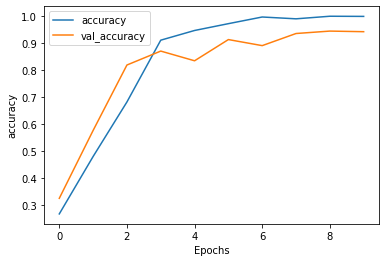

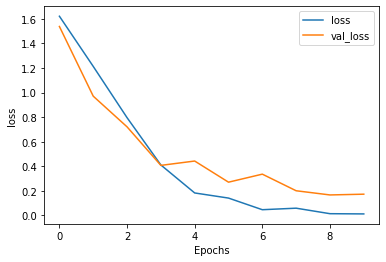

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

###**Prediction**

- Finally, we call the method predict() to perform prediction on the text.


In [31]:
txt = ["house prices show slight increase prices of homes in the uk rose a seasonally adjusted 0.5% in february  says the nationwide building society.  the figure means the annual rate of increase in the uk is down to 10.2%  the lowest rate since june 2001. the annual rate has halved since august last year  as interest rises have cooled the housing market. at the same time  the number of mortgage approvals fell in january to a near 10-year low  official bank of england figures have shown.  nationwide said that in january house prices went up by 0.4% on the month and by 12.6% on a year earlier.  we are not seeing the market collapsing in the way some had feared   said nationwide economist alex bannister. there have been a number of warnings that the uk housing market may be heading for a downturn after four years of strong growth to 2004. in november  barclays  which owns former building society the woolwich  forecast an 8% fall in property prices in 2005  followed by further declines in 2006 and 2007. and last summer  economists at pricewaterhousecoopers (pwc) warned house prices were overvalued and could fall by between 10% and 15% by 2009.  the price of an average uk property now stands at £152 879. homeowners now expect house prices to rise by 1% over the next six months  mr bannister said. he said if the growth continued at this level then the bank of england may increase interest rates from their current 4.75%.   i think the key is what the bank expects to happen to the housing market. we always thought we would see a small rise  they thought they would see a small decline.  house prices have risen 0.9% this year  nationwide said  and if this pace of increase persists  prices would rise by just under 6% in the year to december. this is slightly above the 0-5% range nationwide predicts.  further evidence of a slowdown in the housing market emerged from bank of england lending figures released on tuesday. new mortgage loans in january fell to 79 000 from 82 000 in december  the bank said. the past few months have seen approvals fall to levels last seen in 1995. the bank revealed that 48 000 fewer mortgages were approved in january than for the same month in 2004. overall  mortgage lending rose by £7.2bn in january  marginally up on the £7.1bn rise in december."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'business', 'politics', 'tech', 'entertainment'] #orig

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[2.6616613e-05 9.1148174e-04 9.8926967e-01 4.6587796e-03 4.5895120e-03
  5.4385810e-04]]
2
business
